## Normal Equation

- SVD = Singular Value Decomposition

In [1]:
# closed form solution to minimize error function

# first, generate some linear-looking data
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)
# np.random.rand: 
# Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
# in this case 100 rows, 1 column

In [2]:
# Computing theta using Normal Equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.53988536],
       [3.00671986]])

In [3]:
# Making prediction using theta
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best) # linear regression with new X dataset to predict Y
y_predict

array([[ 4.53988536],
       [10.55332507]])

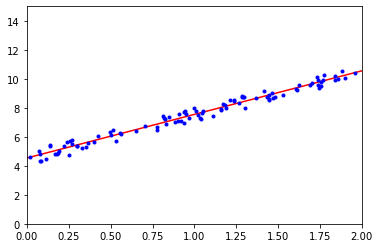

In [4]:
# plotting
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [5]:
# Using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.53988536],
       [10.55332507]])

In [6]:
# same result as lin_reg.intercept_, lin_reg.coef_
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # lstsq() --> least squares
theta_best_svd

array([[4.53988536],
       [3.00671986]])

In [7]:
# or use np.linalg.pinv() to calculate pseudoinverse

np.linalg.pinv(X_b).dot(y)

array([[4.53988536],
       [3.00671986]])

## Gradient Descent

Parameter is determined by the learning rate parameter

In [8]:
# Batch Gradient Descent

eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.53988536],
       [3.00671986]])

## Stochastic Gradient Descent

pick random instance in the training set at every step and computes the gradients based on only on that single instance --> stochastic (random)

In [9]:
# SGD using simple schedule - reducing learning rate gradually

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)    #random index in the range m = stochastic
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.55043322],
       [2.99151825]])

In [10]:
# using sklearn

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
# 1000 epochs, or until loss drops to less than 0.001
# no regularization - penalty = None
# learning rate of 0.1

sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.53718009]), array([3.04561903]))

## Polynomial Regression

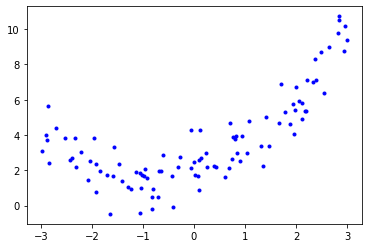

In [11]:
# Quadratic equation

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) 
# numpy.random.randn generates samples from the normal distribution
# while numpy.random.rand from a uniform distribution

import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.show()

In [12]:
# using sklearn

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False) 
# adding the square (second degree) feature in training set
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.05530759]), array([-0.05530759,  0.00305893]))

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# y_hat = 0.487x^2 + 0.955x + 2.225

(array([1.89017415]), array([[0.93967971, 0.56320774]]))

## Learning Curves

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")

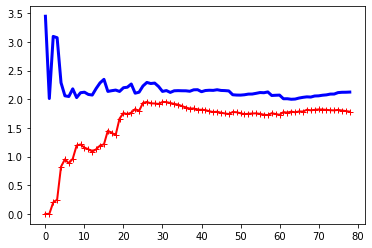

In [15]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

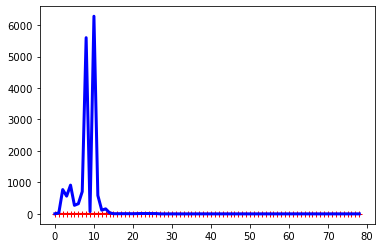

In [16]:
# 10th-degree polynomial model

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_feaures", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## Ridge Regression

Regularized version of Linear Regression
- add a regularization term: $\alpha \Sigma_{i=1}^{n} \theta_{i}^2$ to cost function during TRAINING
- it equals to the half of the square of the $l_2$ norm of the weight vector
- forces the learning algorithm to not only fit the data but also keep the model weights small as possible

In [17]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.0679544]])

In [18]:
# using SGD
sgd_reg = SGDRegressor(penalty = "l2") # ridge regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.05941767])

## Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression, another regularized version of Linear Regression
- use $l_{2}$ norm of the weight vector, $\alpha \Sigma_{i=1}^n |\theta_i|$

In [19]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.02456238])

## Elastic Net

Between Ridge and Lasso Regression
- regularization term is a mix of both Ridge and Lasso

In [20]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.02497239])

## Early Stopping

To prevent overfitting

In [21]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [22]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# prepare the data
poly_scaler = Pipeline([
    ("poly_featues", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start=True,
                      penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict  =sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Logistic Regression

Used to estimate the probability that an instance belongs to a particular class
- positive class = 1 (belongs to that class)
- negative class = 0 (does not belong to that class)

In [24]:
# Decision Boundaries using Iris dataset

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1if Iris virginica, else theta

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

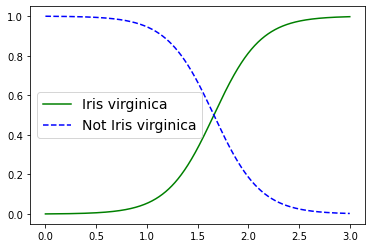

In [27]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)
plt.plot(X_new, y_prob[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label = "Not Iris virginica")
plt.legend(loc="center left", fontsize=14)

In [29]:
# prediction

log_reg.predict([[1.7], [1.5]]) # from graph, above 1.6 = Iris virginica, below 1.6 = Not Iris virginica

array([1, 0])

## Softmax Regression

Generalized logistic regression model to support multiple classes directly, without having to train and combine multiple binary classifiers

In [31]:
# using sklearn.linear_model, LogisticRegression

X = iris["data"][:, (2, 3)] # petal length, width
y = iris["target"]

In [39]:
softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [40]:
softmax_reg.predict([[5, 2]])

array([2])

In [41]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])